Initial Data Overview:
   jee_main_score  jee_advanced_score  mock_test_score_avg school_board  \
0           78.95               59.22                59.86         CBSE   
1           70.06               58.75                64.33        State   
2           81.07               37.27                60.83         ICSE   
3           93.32               60.72                69.33         ICSE   
4           68.72               77.73                82.37         CBSE   

   class_12_percent  attempt_count coaching_institute  daily_study_hours  \
0             70.09              1            FIITJEE                5.4   
1             78.00              1            FIITJEE                5.5   
2             64.36              1            FIITJEE                7.0   
3             73.21              1            FIITJEE                2.1   
4             89.02              1              Allen                6.3   

  family_income parent_education location_type peer_pressure_level  \

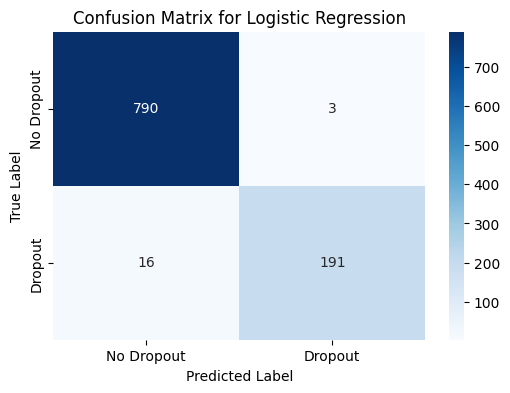


Training Random Forest...
Random Forest Performance:
  Accuracy: 0.9940
  Precision: 1.0000
  Recall: 0.9710
  F1-Score: 0.9853


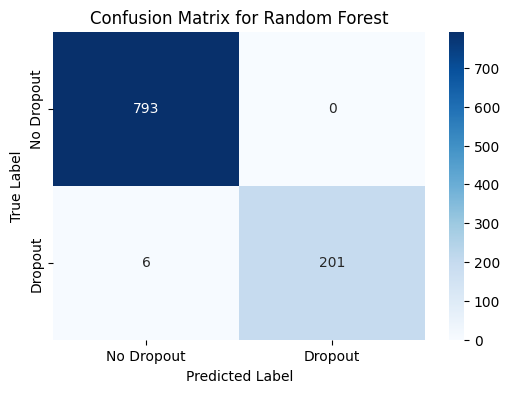


Training Gradient Boosting...
Gradient Boosting Performance:
  Accuracy: 0.9980
  Precision: 0.9952
  Recall: 0.9952
  F1-Score: 0.9952


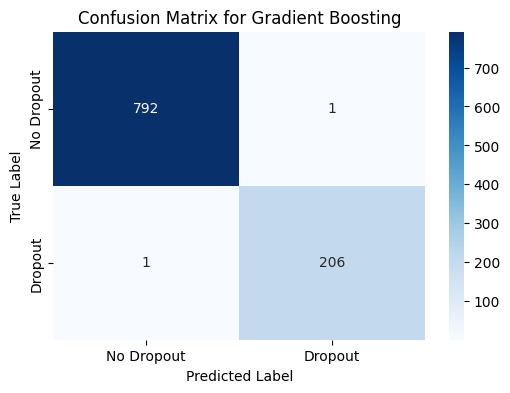


--- 4. Feature Importance ---
Random Forest Feature Importance:
                       feature  importance
10           family_income_Low    0.371818
20         admission_taken_Yes    0.287042
5            daily_study_hours    0.094602
11           family_income_Mid    0.042999
0               jee_main_score    0.033691
2          mock_test_score_avg    0.028153
1           jee_advanced_score    0.027839
3             class_12_percent    0.026923
17     peer_pressure_level_Low    0.025014
18  peer_pressure_level_Medium    0.019177

Gradient Boosting Feature Importance:
                       feature  importance
20         admission_taken_Yes    0.479400
10           family_income_Low    0.328508
5            daily_study_hours    0.078028
17     peer_pressure_level_Low    0.048911
18  peer_pressure_level_Medium    0.048425
1           jee_advanced_score    0.009555
0               jee_main_score    0.006659
3             class_12_percent    0.000181
19    mental_health_issues_Yes    0.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset
try:
    df = pd.read_csv('/content/JEE_Dropout_After_Class_12.csv')
except FileNotFoundError:
    print("Error: The file 'JEE_Dropout_After_Class_12.csv' was not found. Please upload the file or check the path.")
    exit()

# Display the first few rows and column information
print("Initial Data Overview:")
print(df.head())
print("\nColumn Information:")
df.info()

# 2. Preprocessing: Handle categorical features and split data
# The 'dropout' column is already in the correct format (1 or 0)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Use one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('dropout', axis=1)
y = df_encoded['dropout']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into {len(X_train)} training samples and {len(X_test)} testing samples.")
print(f"Dropout ratio in training set: {y_train.sum() / len(y_train):.2f}")
print(f"Dropout ratio in testing set: {y_test.sum() / len(y_test):.2f}")

# Scale numerical features for better model performance (especially for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3. Model Implementation and Comparison
print("\n--- 3. Implementing and Comparing Models ---")

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    # Logistic Regression requires scaled data
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    print(f"{name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    # Generate and display a confusion matrix for each model
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dropout', 'Dropout'], yticklabels=['No Dropout', 'Dropout'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# 4. Feature Importance Analysis (for tree-based models)
print("\n--- 4. Feature Importance ---")
# Feature importance is not directly available for Logistic Regression in the same way,
# but we can look at the coefficients.
print("Random Forest Feature Importance:")
feature_importances_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': models['Random Forest'].feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importances_rf.head(10))

print("\nGradient Boosting Feature Importance:")
feature_importances_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': models['Gradient Boosting'].feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importances_gb.head(10))

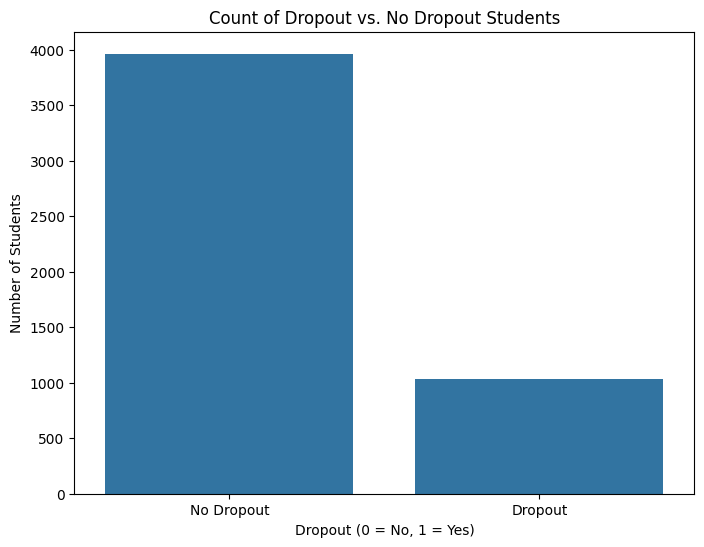

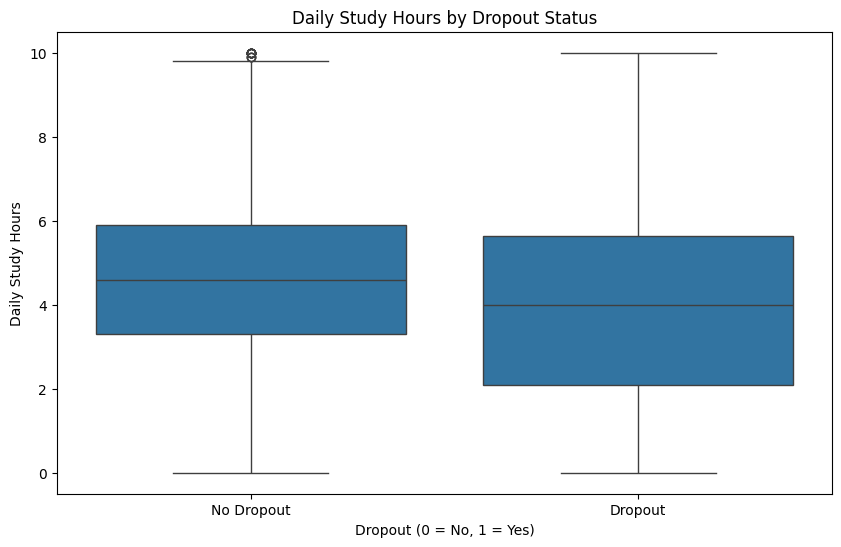

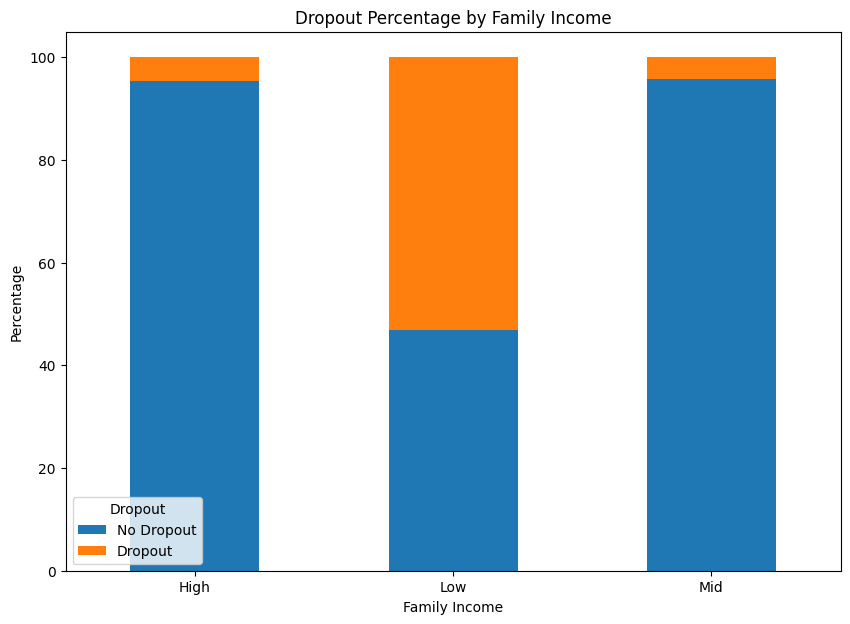

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Make sure the file 'JEE_Dropout_After_Class_12.csv' is in your working directory.
df = pd.read_csv('/content/JEE_Dropout_After_Class_12.csv')

# --- Plot 1: Bar chart for Dropout vs. No Dropout ---
plt.figure(figsize=(8, 6))
sns.countplot(x='dropout', data=df)
plt.title('Count of Dropout vs. No Dropout Students')
plt.xlabel('Dropout (0 = No, 1 = Yes)')
plt.ylabel('Number of Students')
plt.xticks([0, 1], ['No Dropout', 'Dropout'])
plt.savefig('dropout_count_bar_chart.png')
plt.show()

# --- Plot 2: Box plot for Daily Study Hours vs. Dropout ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='dropout', y='daily_study_hours', data=df)
plt.title('Daily Study Hours by Dropout Status')
plt.xlabel('Dropout (0 = No, 1 = Yes)')
plt.ylabel('Daily Study Hours')
plt.xticks([0, 1], ['No Dropout', 'Dropout'])
plt.savefig('daily_study_hours_boxplot.png')
plt.show()

# --- Plot 3: Stacked Bar Chart for Family Income vs. Dropout ---
# Create a cross-tabulation for Family Income and Dropout
family_income_dropout = pd.crosstab(df['family_income'], df['dropout'], normalize='index') * 100

family_income_dropout.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Dropout Percentage by Family Income')
plt.xlabel('Family Income')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Dropout', labels=['No Dropout', 'Dropout'])
plt.savefig('family_income_stacked_bar_chart.png')
plt.show()